In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm
from matplotlib import cm
import matplotlib as mpl
%matplotlib notebook

In [111]:
G_Drive = 'C:\\Users\\User\\Google Drive\\'
Dpath = G_Drive+'FishIsland_Outputs/Upscaled_Estimates.csv'

Data = pd.read_csv(Dpath,index_col=['datetime'],parse_dates=['datetime'])
Data = Data.drop(columns=['datetime.1'])
# Data.head()
Data[['fch4','FCH4_FP']].describe()

,fch4,FCH4_FP
count,653.000000,96408.000000
mean,33.751318,18.138617
std,11.990650,8.349124
min,3.732564,-5.216854
25%,24.934080,13.254715
50%,33.315963,16.643802
75%,42.685349,20.674760
max,63.003855,63.003855


# Validation

In [607]:
# print(Data.loc[Data['NEE_FSO'].isnull()==False,
#                ['NEE_est','NEE_est_CI','NME_est','NME_est_CI']].mean().round(2))

EC


NEE_est       -0.62
NEE_est_CI     0.29
NME_est       26.27
NME_est_CI     4.00
dtype: float64


In [614]:
# X = 'fco2'
# y = 'NEE_est'

# # fig,ax=plt.subplots(1,2,figsize=(6,3))

# DNA=(Data[[X,y,y+'_CI']].dropna())
# RMSE = metrics.mean_squared_error(DNA[X],DNA[y])**.5
# Data[[X,y]].mean()
# print('r2',(metrics.r2_score(DNA[X],DNA[y])*100).round(2))
# print('RMSE',(RMSE).round(2))
# print('MBE',((DNA[X]-DNA[y])).mean().round(2))
# print(DNA.describe())

# # X2 = sm.add_constant(DNA[X])
# # est = sm.OLS(DNA[y], X2)
# # est2 = est.fit()
# # print(est2.summary())
# # with open(G_Drive+'PhD_Thesis\\Chapter3_Figs/'+X[0]+'_v_'+y+'_summary.txt', 'w') as fh:
# #     fh.write(est2.summary().as_text())

# # ax[0].scatter(DNA[X],DNA[y],edgecolor='k',facecolor=NEE_c)
# # ax[0].grid()
# # ax[0].plot([DNA[X].min(),DNA[X].max()],est2.predict([[1,DNA[X].min()],[1,DNA[X].max()]]),color='b',linewidth=2,label = 'OLS Fit')
# # ax[0].plot([DNA[X].min(),DNA[X].max()],[DNA[X].min(),DNA[X].max()],color='k',label='1:1',linewidth=2)

# # Data['NEE_Diff'] = Data[X] - Data[y]

# X = 'fch4'
# y = 'FCH4_FP_est'

# DNA=(Data[[X,y,y+'_CI']].dropna())

# RMSE = metrics.mean_squared_error(DNA[X],DNA[y])**.5
# print(DNA.describe())
# # Data[[X,y]].mean()
# print('r2',(metrics.r2_score(DNA[X],DNA[y])*100).round(2))
# print('RMSE',RMSE.round(2))
# print('MBE',((DNA[X]-DNA[y])).mean().round(2))

# # X2 = sm.add_constant(DNA[X])
# # est = sm.OLS(DNA[y], X2)
# # est2 = est.fit()
# # print(est2.summary())
# # with open(G_Drive+'PhD_Thesis\\Chapter3_Figs/'+X[0]+'_v_'+y+'_summary.txt', 'w') as fh:
# #     fh.write(est2.summary().as_text())

# # # plt.figure()
# # ax[1].scatter(DNA[X],DNA[y],edgecolor='k',facecolor=NME_c)
# # ax[1].grid()
# # ax[1].plot([DNA[X].min(),DNA[X].max()],est2.predict([[1,DNA[X].min()],[1,DNA[X].max()]]),color='b',linewidth=2,label = 'OLS Fit')
# # ax[1].plot([DNA[X].min(),DNA[X].max()],[DNA[X].min(),DNA[X].max()],color='k',label='1:1',linewidth=2)

# # ax[0].set_ylabel('Estimated NEE $\mu mol m^{-2} s^{-1}$')
# # ax[0].set_xlabel('Observed $F_{CO2}$ $\mu mol m^{-2} s^{-1}$')
# # ax[1].set_ylabel('Estimated NME $nmol m^{-2} s^{-1}$')
# # ax[1].set_xlabel('Observed $F_{CH4}$ $nmol m^{-2} s^{-1}$')

# # ax[0].set_title('a.',loc='left')
# # ax[0].legend()
# # ax[1].set_title('b.',loc='left')
# # ax[1].legend()

# # plt.tight_layout()
# # plt.savefig(G_Drive+'PhD_Thesis\\Chapter3_Figs/Evaluation.png',dpi=600)

In [617]:
X = 'fco2'
y = 'NEE_est'

DNA=(Data[[X,y,y+'_CI']].dropna())
RMSE = metrics.mean_squared_error(DNA[X],DNA[y])**.5
Data[[X,y]].mean()
print('r2',(metrics.r2_score(DNA[X],DNA[y])*100).round(2))
print('RMSE',(RMSE).round(2))
print('MBE',((DNA[X]-DNA[y])).mean().round(2))
print(DNA.describe())
print(DNA[X].std()/DNA[X].count()**.5*stats.t.ppf(0.025,DNA[X].count()))
print()

X = 'fch4'
y = 'FCH4_FP_est'

DNA=(Data[[X,y,y+'_CI']].dropna())
RMSE = metrics.mean_squared_error(DNA[X],DNA[y])**.5
print('r2',(metrics.r2_score(DNA[X],DNA[y])*100).round(2))
print('RMSE',RMSE.round(2))
print('MBE',((DNA[X]-DNA[y])).mean().round(2))
print(DNA.describe())
print(DNA[X].std()/DNA[X].count()**.5*stats.t.ppf(0.025,DNA[X].count()))



r2 91.23
RMSE 0.44
MBE 0.01
              fco2      NEE_est   NEE_est_CI
count  1164.000000  1164.000000  1164.000000
mean     -0.892303    -0.903801     0.252264
std       1.480637     1.384169     0.079380
min      -4.939822    -4.126862     0.100584
25%      -2.083515    -2.076470     0.190943
50%      -0.923200    -0.982160     0.241832
75%       0.500982     0.520085     0.297699
max       2.236564     1.487605     0.774645
-0.08514753527373042

r2 73.85
RMSE 6.13
MBE 1.25
             fch4  FCH4_FP_est  FCH4_FP_est_CI
count  653.000000   653.000000      653.000000
mean    33.751318    32.497981        3.279642
std     11.990650     9.262099        0.869210
min      3.732564    10.644032        1.490665
25%     24.934080    26.144587        2.664189
50%     33.315963    31.641132        3.184378
75%     42.685349    40.624570        3.762906
max     63.003855    54.137730        8.147997
-0.9213824329557532


# Yearly

In [224]:
Yearly = Data.resample('Y').mean()[['Air_Temp']]
Yearly[['Peak_NDVI','Peak_Thaw_Depth']] = Data.resample('Y').max()[['NDVI_FI_LCP','Active_Layer_1']]
for index,row in Yearly.iterrows():
    y =index.year
    Yearly.loc[Yearly.index==index,'Peak_GS_Date']=Data.loc[((Data.index.year==y)&
        (Data['NDVI_FI_LCP']==row['Peak_NDVI']))].index.date[0]

    
       
Data['Date'] = Data.index.date
# Data['Melt_Start'] = Data.index.date
Yearly['Melt_Date'] = Data.loc[Data['Snow_Class']=='Snow Free'].resample('Y').min()['Date']
Yearly['Start_Date'] = Data.loc[Data['Study_Season']==1].resample('Y').min()['Date']
Yearly['GS_Date'] = Data.loc[Data['NDVI_FI_LCP']>=0.25].resample('Y').min()['Date']
Yearly['Senescent_Date'] = Data.loc[Data['Senescent_Season']==1].resample('Y').min()['Date']
Yearly['End_Date'] = Data.loc[Data['Study_Season']==1].resample('Y').max()['Date']

Yearly['Duration'] = Yearly['End_Date']-Yearly['Start_Date']


Yearly['Snowmelt']=pd.to_datetime(Yearly['Melt_Date']).dt.strftime('%d %b')
Yearly['Study_Start']=pd.to_datetime(Yearly['Start_Date']).dt.strftime('%d %b')#'%b-%d')
Yearly['Study_End']=pd.to_datetime(Yearly['End_Date']).dt.strftime('%d %b')

Yearly.round(2)
Yearly['Study Season'] = Yearly['Study_Start']+' - '+Yearly['Study_End']#
Yearly[['Study Season','Duration']]

Yearly['Duration'].describe()



count                             11
mean     116 days 10:54:32.727272728
std        9 days 10:30:28.933863533
min                104 days 00:00:00
25%                109 days 12:00:00
50%                115 days 00:00:00
75%                126 days 00:00:00
max                129 days 00:00:00
Name: Duration, dtype: object

In [ ]:
p

In [574]:
# plt.figure()
Am = Data.loc[Data['Study_Season']==1,['NEE_est','NME_est']].resample('Y').mean()

# print(((Am-Am.mean())/Am.std()).describe().round())#sharey=True,edgecolo
# print(Data.loc[Data['Study_Season']==1,['NEE_est','NEE_est_CI']].mean().round(2))
# print(Data.loc[Data['Study_Season']==1,['NEE_est','NEE_est_CI']].resample('Y').mean().std())
# # D['Diff']=D['NEE_est']+D['NEE_est_CI']
# # print(D)

# print(Data.loc[Data['Study_Season']==1,['NME_est','NME_est_CI']].mean().round(2))
# print(Data.loc[Data['Study_Season']==1,['NME_est','NME_est_CI']].resample('Y').mean().std())

       NEE_est  NME_est
count     11.0     11.0
mean      -0.0      0.0
std        1.0      1.0
min       -2.0     -2.0
25%       -1.0     -0.0
50%       -0.0      0.0
75%        1.0      0.0
max        2.0      2.0


             NEE_est  NEE_est_CI    NME_est  NME_est_CI  Study_Season  MM-DD
datetime                                                                    
2009-06-06  1.306923    0.987086  22.352821   12.178397           1.0  06-06
2009-06-07  1.148286    1.031303  23.928739   10.426256           1.0  06-07
2009-06-08  0.419974    0.920697  28.376055    8.595321           1.0  06-08
2009-06-09  0.728363    0.951076  25.862949    9.621486           1.0  06-09
2009-06-10  1.073558    0.917707  23.972224    9.546890           1.0  06-10
...              ...         ...        ...         ...           ...    ...
2019-10-02  0.806835    0.643954  16.330635    8.436201           1.0  10-02
2019-10-03  0.871725    0.579008  15.629053    8.668785           1.0  10-03
2019-10-04  0.845092    0.501741  15.664312    6.702069           1.0  10-04
2019-10-05  0.936568    0.604744  14.503259    6.985272           1.0  10-05
2019-10-06  1.406246    0.815897  14.757503    8.348158           1.0  10-06

<IPython.core.display.Javascript object>


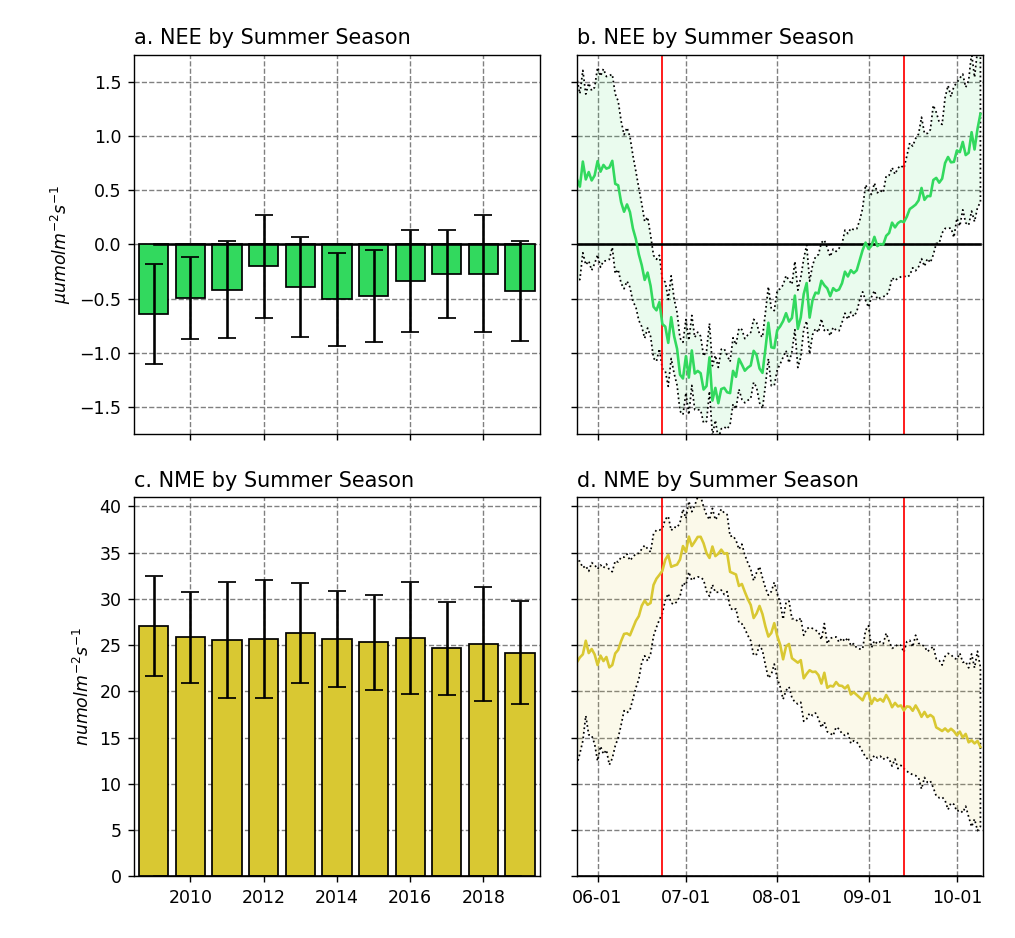

        NEE_est  NEE_est_CI    NME_est  NME_est_CI   C
MM-DD                                                 
05-25  0.602261    0.925301  23.156623   11.084929 NaN
05-26  0.533322    0.857185  23.671535   10.371094 NaN
05-27  0.764476    0.841182  23.999271    9.355407 NaN
05-28  0.599582    0.787589  25.470205    8.098137 NaN
05-29  0.667935    0.819539  24.138311    8.834394 NaN
...         ...         ...        ...         ...  ..
10-05  0.844897    0.667504  14.496537    8.044911 NaN
10-06  1.035683    0.728100  14.709216    9.334954 NaN
10-07  0.876003    0.665576  14.374796    8.167077 NaN
10-08  1.064732    0.724399  14.645358    9.691965 NaN
10-09  1.203618    0.814565  13.998263    8.615297 NaN

[138 rows x 5 columns]
Index(['06-15', '06-16', '06-17', '06-18', '06-19', '06-20', '06-21', '06-22',
       '06-23', '06-24', '06-25', '06-26', '06-27', '06-28', '06-29', '06-30',
       '07-01', '07-02', '07-03', '07-04', '07-05', '07-06', '07-07', '07-08',
       '07-09', '07-10',

In [489]:
Data['MM-DD'] = Data.index.strftime('%m-%d')

A_sum = Data.loc[Data['Study_Season']==1,['NEE_est','NEE_est_CI','NME_est','NME_est_CI']].resample('Y').mean()

Temp = Data.loc[Data['Study_Season']==1,
     ['NEE_est','NEE_est_CI','NME_est','NME_est_CI','Study_Season',
     ]].resample('D').agg(pd.Series.mean, skipna=False)#.resample('D').first()
Temp['MM-DD'] = Data.loc[Data['Study_Season']==1,
     ['MM-DD']].resample('D').first()#.resample('D').first()
# Temp.loc[Temp['Study_Season']]
M_sum = Temp[['NEE_est','NEE_est_CI','NME_est','NME_est_CI','MM-DD'
     ]].groupby('MM-DD').agg(pd.Series.mean, skipna=False)
M_sum['C'] = Data.loc[Data['Study_Season']==1,
     ['Air_Temp']].groupby(Data.loc[Data['Study_Season']==1].index.dayofyear).count()[1:-1]
print(Temp)
# M_sum = M_sum.loc[M_sum['C']>=11]

fig,((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2,figsize=(6.5,6),sharex='col',sharey='row')

NEE_c = '#32d95e'
NME_c = '#d9c832'


ax1.plot(A_sum.index.year,A_sum['NEE_est']*0,color='k')
ax2.plot(A_sum.index.year,A_sum['NEE_est']*0,color='k')

ax1.bar(A_sum.index.year,A_sum['NEE_est'],yerr=A_sum['NEE_est_CI'],capsize=5,edgecolor='k',facecolor=NEE_c)
ax2.bar(A_sum.index.year,A_sum['NME_est'],yerr=A_sum['NME_est_CI'],capsize=5,edgecolor='k',facecolor=NME_c)

ax1.set_axisbelow(True)
ax1.grid(color='gray', linestyle='dashed')
ax2.set_axisbelow(True)
ax2.grid(color='gray', linestyle='dashed')

ax1.set_ylabel(Units[0])
ax2.set_ylabel(Units[1])
ax1.set_title('a. NEE by Summer Season',loc='left')
ax2.set_title('c. NME by Summer Season',loc='left')
# ax1.set_label(Units[1])
ax2.set_xlim(2008.45,2019.55)

print(M_sum)

ax3.plot(M_sum['NEE_est']*0,color='k')

ax3.plot(M_sum['NEE_est'],color=NEE_c)
ax3.fill_between(M_sum.index,M_sum['NEE_est']+M_sum['NEE_est_CI'],M_sum['NEE_est']-M_sum['NEE_est_CI'],
                facecolor=NEE_c+'1A',edgecolor=ecolor,linestyle=':')

ax4.plot(M_sum['NEE_est']*0,color='k')

ax4.plot(M_sum['NME_est'],color=NME_c)
ax4.fill_between(M_sum.index,M_sum['NME_est']+M_sum['NME_est_CI'],M_sum['NME_est']-M_sum['NME_est_CI'],
                facecolor=NME_c+'1A',edgecolor=ecolor,linestyle=':')

# ax3.set_ylabel(Units[0])
# ax4.set_ylabel(Units[1])
ax3.set_title('b. NEE by Summer Season',loc='left')
ax4.set_title('d. NME by Summer Season',loc='left')


ax3.set_axisbelow(True)
ax3.set_ylim(-1.75,1.75)
ax3.grid(color='gray', linestyle='dashed')
ax4.set_axisbelow(True)
ax4.set_ylim(0,41)
ax4.grid(color='gray', linestyle='dashed')

for a in [ax3,ax4]: 
    a.axvspan('06-23','06-23',facecolor=[.97,.97,.97,.0],edgecolor='r')
    a.axvspan('09-13','09-13',facecolor=[.97,.97,.97,.0],edgecolor='r')

P = [7,37,68,99,129,]#136,]#153]#,167]#,183]#,197,210,228]

ax4.set_xticks(P)#[0::2])
ax4.set_xlim(0,138)

plt.tight_layout()
print(M_sum.loc[M_sum['NEE_est']<0].index)

plt.savefig(G_Drive+'PhD_Thesis\\Chapter3_Figs/AnnualSums.png',dpi=600)

<IPython.core.display.Javascript object>


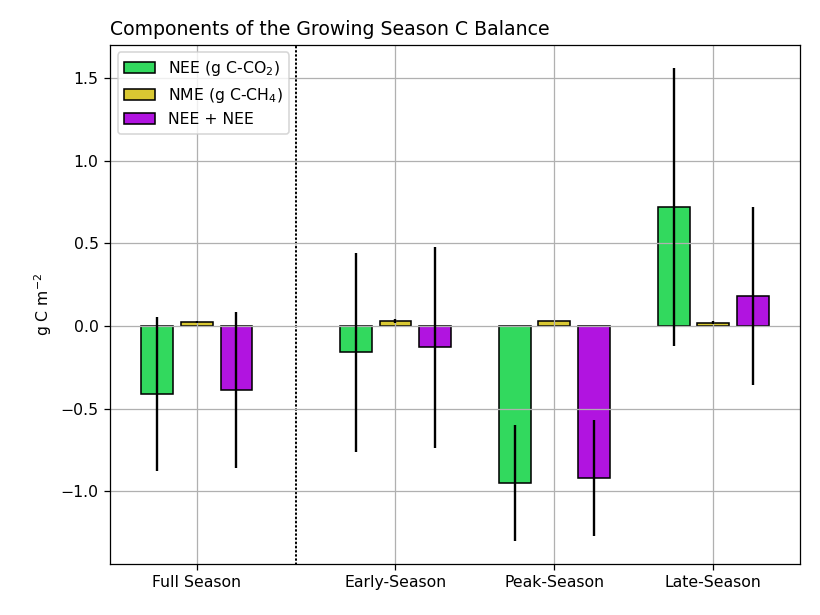

              NEE_est_c  NEE_est_c_CI  NME_est_c  NME_est_c_CI     C  C_CI  \
Season_Class                                                                 
Early-Season      -0.16          0.60       0.03          0.01 -0.13  0.61   
Study-Season      -0.95          0.35       0.03          0.00 -0.92  0.35   
Late-Season        0.72          0.84       0.02          0.01  0.18  0.54   

                xi  
Season_Class        
Early-Season   4.0  
Study-Season   8.0  
Late-Season   12.0  


In [508]:
# from scipy import stats

# A_sum[['NME_est','NME_est_CI']]


A_sum[['NEE_est','NME_est']].corr()**2

Data.resample('D').mean()[['NEE_est','NME_est']].corr()**2

# Data.loc[Data.index.dayofyear>=
Data.loc[Data['fco2'].isnull()==False,'DOY']
Data.loc[((Data['DOY']>=174)&(Data['DOY']<=256)),
         ['NEE_est','NEE_est_CI','NME_est','NME_est_CI']].resample('Y').mean()
Data.loc[((Data['DOY']>=174)&(Data['DOY']<=256)),
         ['C','C_CI']].resample('Y').sum()

Data.loc[(((Data['DOY']<174)|(Data['DOY']>256))&(Data['Study_Season']==1)),
         ['C','C_CI']].resample('Y').sum()


Data.loc[(((Data['DOY']>256))&(Data['Study_Season']==1)),
         ['C','C_CI']].resample('Y').sum()


Data['Season_Class'] = 'Excluded'


# Data.loc[((Data['DOY']>=174)&(Data['DOY']<=256)),'Season_Class'] = 'Study-Season'

Data.loc[((Data.index.month==7)|((Data.index.month==8)&(Data.index.day<=21))),'Season_Class'] = 'Study-Season'

# Data.loc[((Data['DOY']<174)&(Data['Study_Season']==1)),'Season_Class'] = 'Early-Season'
Data.loc[((Data.index.month<7)&(Data['Study_Season']==1)),'Season_Class'] = 'Early-Season'
# Data.loc[((Data['DOY']>245)&(Data['Study_Season']==1)),'Season_Class'] = 'Late-Season'
Data.loc[((Data.index.month==9)|(Data.index.month==10)|((Data.index.month==8)&(Data.index.day>21))),'Season_Class'] = 'Late-Season'
Data.loc[((Data['DOY']>=174)&(Data['DOY']<=256)),'xi'] = 2
Data.loc[((Data['DOY']<=174)&(Data['Study_Season']==1)),'xi'] = 1
Data.loc[((Data['DOY']>=245)&(Data['Study_Season']==1)),'xi'] = 3

S = (Data.groupby(Data['Season_Class']).mean()[['NEE_est_c','NEE_est_c_CI','NME_est_c','NME_est_c_CI',    
    'C','C_CI','xi']]*24).round(2).dropna().sort_values(by='xi')
S['xi'] = (Data.groupby(Data['Season_Class']).median()[['xi']]*24).round(2).dropna().sort_values(by='xi')
S['xi']/=6


NEE_c = '#32d95e'
NME_c = '#d9c832'
# S.loc[S['']]
C_c = '#b114e0'

plt.figure()
plt.bar(S['xi'],S['NEE_est_c'],yerr=S['NEE_est_c_CI'],color=NEE_c,edgecolor='k',label='NEE (g C-CO$_2$)')
plt.bar(S['xi']+1,S['NME_est_c'],yerr=S['NME_est_c_CI'],color=NME_c,edgecolor='k',label='NME (g C-CH$_4$)')
plt.bar(S['xi']+2,S['C'],yerr=S['C_CI'],color=C_c,edgecolor='k',label='NEE + NEE')

FS = Data.groupby(Data['Study_Season']).mean()[['NEE_est_c','NEE_est_c_CI','NME_est_c','NME_est_c_CI',    
    'C','C_CI','xi']]*24

plt.bar([-1],FS['NEE_est_c'],yerr=FS['NEE_est_c_CI'],color=NEE_c,edgecolor='k')
plt.bar([0],FS['NME_est_c'],yerr=FS['NME_est_c_CI'],color=NME_c,edgecolor='k')
plt.bar([1],FS['C'],yerr=FS['C_CI'],color=C_c,edgecolor='k')

plt.axvspan(2.5,2.5,facecolor=[.97,.97,.97,.0],edgecolor='k',linestyle=':')

plt.xticks([0,5,9,13],['Full Season','Early-Season','Peak-Season','Late-Season'])
# plt.plot([-0.5,2.5],[0,0],color='k')
# plt.xlim(3,19.2)
plt.ylabel('g C m$^{-2}$')
plt.legend(loc=2)
plt.grid()
plt.title('Components of the Growing Season C Balance', loc='left')
plt.tight_layout()
Data.groupby(Data.index.month).mean()[['NEE_est','NEE_est_CI','NME_est','NME_est_CI']]
print(S)

<IPython.core.display.Javascript object>


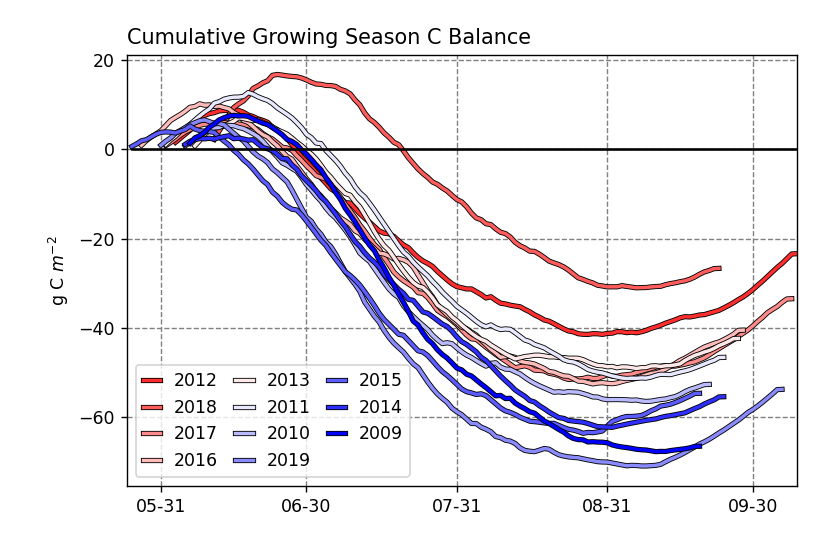

            Max      Total   Total_CI         CO2       CH4      Frac
2012 -41.433281 -23.360302  63.995776  208.046755  4.706551  0.022623
2018 -30.993853 -26.645307  58.979845  225.272880  4.782709  0.021231
2017 -51.516739 -33.441754  55.105671  162.606606  4.848596  0.029818
2016 -52.515116 -40.477211  61.227092  195.364490  4.763577  0.024383
2013 -49.065392 -42.337815  54.111270  195.962476  4.846363  0.024731
2011 -51.309190 -46.569003  54.482192  181.541838  4.689006  0.025829
2010 -56.446400 -52.628159  42.594052  185.995036  4.749110  0.025534
2019 -70.899287 -53.733770  61.933476  178.017380  4.601780  0.025850
2015 -63.578424 -54.617260  51.880607  167.620119  4.799461  0.028633
2014 -62.241740 -55.391732  49.953246  178.319200  4.782103  0.026818
2009 -67.685993 -66.483543  50.857804  189.570701  4.900375  0.025850


In [414]:
Units = ['$\mu umol m^{-2} s^{-1}$','$n umol m^{-2} s^{-1}$','G']
cm_2_in=1/2.54

Data['On_Off2'] = Data['Study_Season'].shift(-25)
Data['On_Off']=Data[['On_Off2','Study_Season']].mean(axis=1)
Data.loc[Data['Active_Layer_1']==0,'On_Off']=np.nan
Aliases = ['NEE',
'NME','Net C Balance']

Start = 174
End = 256

Yearly = Data[['NEE_est','NME_est','NEE_est_CI','NME_est_CI']].groupby(Data.index.dayofyear).apply(lambda g: g.mean(skipna=False))
import matplotlib.patheffects as pe

fig,axes = plt.subplots(1,figsize=(5.25,3.5))
norm = mpl.colors.Normalize(vmin=0, vmax=11)
Colors = []
for i in range(0,11):
    rgba_color = cm.bwr(norm(i)) 
    Colors.append(rgba_color)

mult = {'fco2':(1e-6 * 12.0107 *3600),
        'fch4':(1e-9 * 12.0107 *3600) }

Data['NEE_est_c'] = Data['NEE_est']*mult['fco2']
Data['NEE_est_c_CI'] = Data['NEE_est_CI']*mult['fco2']
Data['NME_est_c'] = Data['NME_est']*mult['fch4']
Data['NME_est_c_CI'] = Data['NME_est_CI']*mult['fch4']
Data['C']=(Data['NEE_est_c']+Data['NME_est_c'])*Data['Study_Season']
Data['C_CI']=(Data['NEE_est_c_CI']+Data['NME_est_c_CI'])*Data['Study_Season']
Data['Air_Temp']=Data['Air_Temp']*Data['Study_Season']
Yz = Data.loc[Data.index.year>=2009].resample('Y').sum()['C'].sort_values(ascending=False)

i = Yz.index.year.shape[0]-1
Mx,Pd,Sm,Sm_c,CO2,CH4 = [],[],[],[],[],[]
Yix = []

ax=axes
for y in Yz.index.year:#[::-1]:
    if y >=2009 and y<=2019:
        Yix.append(y)
        T = Data.loc[((Data.index.year==y)&
                     (Data.index.dayofyear>=145)&(Data.index.month<=283))].copy().sort_index()
        Year = T.groupby('MM-DD').sum()[['C','C_CI','NEE_est_c','NME_est_c']].cumsum()
        Year['Study_Season'] = T.groupby('MM-DD').mean()[['Study_Season']]
#         Year.loc[Year['Study']]
        Year['C']=Year['C']*Year['Study_Season']
        Year['C_CI']=Year['C_CI']*Year['Study_Season']

        Mx.append(Year['C'].min())
        Pd.append(Year.loc[Year['C']==Year['C'].min()].index)
        Sm.append(Year['C'].dropna()[-1:].values[0])
        Sm_c.append(Year['C_CI'].dropna()[-1:].values[0])
        
        Ix = Year.index
        ax.plot(Year.index,Year['C'],#*Year['On_Off'],
                color=Colors[i],label=y,lw=2,
                path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
        CO2.append(Year['NEE_est_c'][-1:].values[0])
        CH4.append(Year['NME_est_c'][-1:].values[0])
        Last = Year[['C','C_CI']].dropna()
        i -=1
        
Cbal = pd.DataFrame(index=Yix,data={'Max':Mx,'Total':Sm,'Total_CI':Sm_c,'CO2':CO2,'CH4':CH4})
Cbal['Frac'] = Cbal['CH4']/Cbal['CO2'].abs()

ax.plot(Year.index,Year['C'].fillna(0)*0,color='k')

ax.grid()
ax.set_title('Cumulative Growing Season C Balance',loc='left')
ax.set_ylabel('g C $m^{-2}$')
# ax.set_xlabel('DOY')
# ax.set_xlim(Start,End)
ax.legend(ncol=3,columnspacing=1,handlelength=1)

Xl1,Xl2=Smin-1,Emax+1

axes.set_axisbelow(True)
axes.grid(color='gray', linestyle='dashed')


P = [7,37,68,99,129,]#136,]#153]#,167]#,183]#,197,210,228]

axes.set_xticks(P)
axes.set_xlim(0,283-145)

# j+=1
plt.tight_layout()
plt.savefig(G_Drive+'PhD_Thesis\\Chapter3_Figs/Modeled_Fluxes_OLS.jpg',dpi=600)

# Data.resample('Y').sum()['Study_Season'].mean()/24
print(Cbal)

In [484]:
# print(Data.loc[Data['Season_Class']=='Study-Season','Active_Layer_1'].describe())
# Data['Active_Layer_1'].describe()
print(Data.loc[Data['Study_Season']==1,['Active_Layer_1','Air_Temp']].describe())#('Y').min())
print(Data[['Active_Layer_1','Air_Temp']].describe())#('Y').min())

       Active_Layer_1      Air_Temp
count    30755.000000  30732.000000
mean         0.350679      8.302024
std          0.123966      5.632690
min          0.026371     -6.400000
25%          0.255197      4.100000
50%          0.367582      7.500000
75%          0.455001     11.800000
max          0.565681     30.000000
       Active_Layer_1      Air_Temp
count    96408.000000  30732.000000
mean         0.251812      8.302024
std          0.233045      5.632690
min          0.000000     -6.400000
25%          0.000000      4.100000
50%          0.255972      7.500000
75%          0.508227     11.800000
max          0.566146     30.000000


<IPython.core.display.Javascript object>


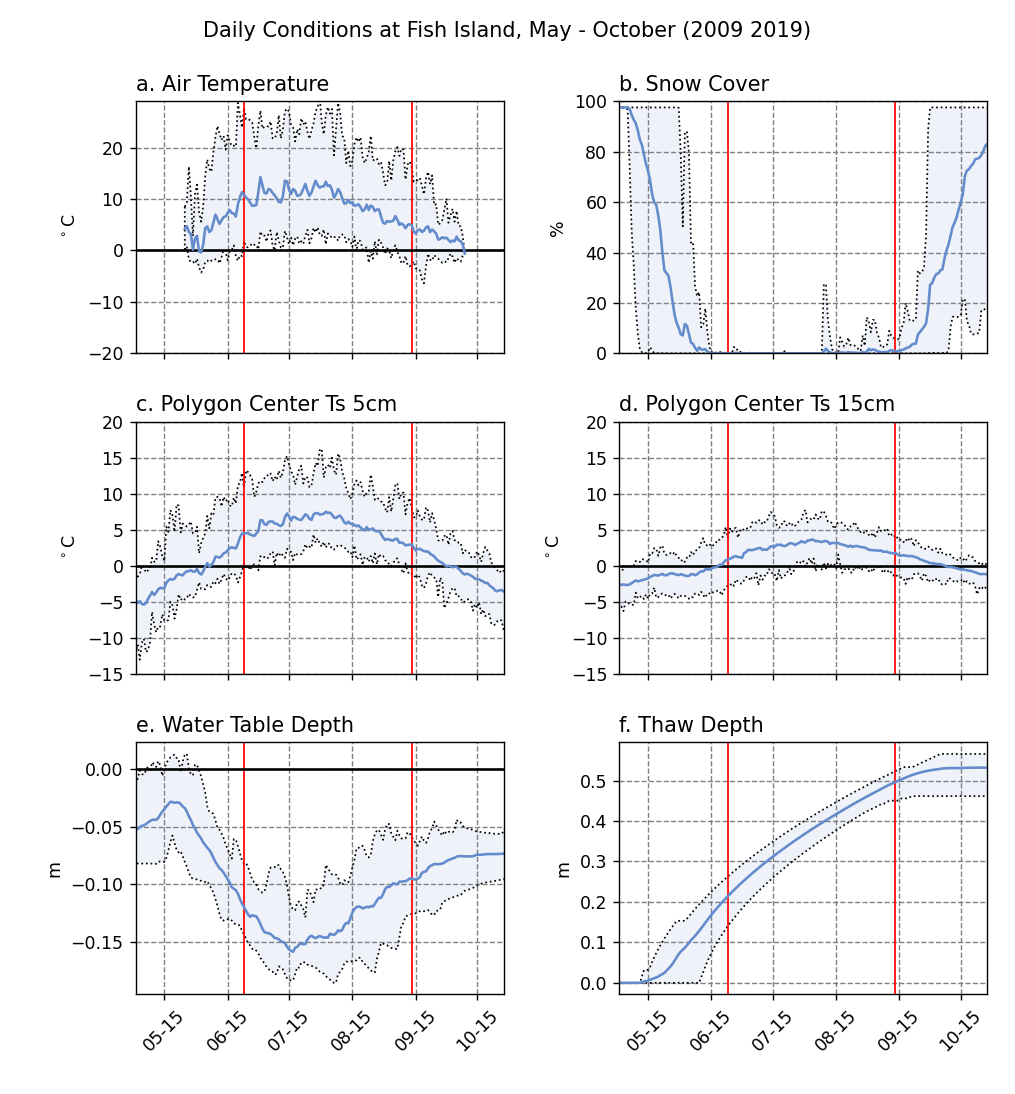

In [469]:
### print((Data_y[['Air_Temp','Rainfall','NR_Wm2_Avg','Temp_5_1','Temp_5_2','Temp_15_1','Temp_15_2','Table_1','Active_Layer_1']].corr()**2).round(2))#,'NR_Wm2_Avg']])
Data['MM-DD'] = Data.index.strftime('%m-%d')
DataT = Data.loc[((Data.index.month>=4)&(Data.index.month<=11))]

Data_d = DataT.groupby('MM-DD').mean()
Data_d['Rainfall'] = DataT.groupby('MM-DD').sum()['Rainfall']
Data_d_mx = DataT.groupby('MM-DD').max()
Data_d_mn = DataT.groupby('MM-DD').min()
# print((Data_d[['Air_Temp','Rainfall','NR_Wm2_Avg','Temp_5_1','Temp_5_2','Temp_15_1','Temp_15_2','Table_1','Active_Layer_1']].corr()**2).round(2))#,'NR_Wm2_Avg']])

fig,axes = plt.subplots(3,2,figsize=(6.5,7),sharex=True)#(18.2*cm_2_in, 13*cm_2_in),sharex=True)



ecolor='k'
ax = axes[0,0]
ax.plot(Data_d['Temp_5_1']*0,color='k')
ax.plot(Data_d['Air_Temp'],color='#648ccc')
ax.fill_between(Data_d.index,Data_d_mn['Air_Temp'],Data_d_mx['Air_Temp'],
                facecolor='#648ccc1A',edgecolor=ecolor,linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('a. Air Temperature',loc='left')
ax.set_ylabel('$^\circ$C')
ax.set_ylim(-20,29)

ax = axes[0,1]
# ax.plot(Data_d['Temp_5_1']*0,color='k')
ax.plot(Data_d['snow_cover'],color='#648ccc')
ax.fill_between(Data_d.index,Data_d_mn['snow_cover'],Data_d_mx['snow_cover'],
                facecolor='#648ccc1A',edgecolor=ecolor,linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('b. Snow Cover',loc='left')
ax.set_ylabel('%')
ax.set_ylim(0,100)


ax = axes[1,0]
ax.plot(Data_d['Temp_5_1']*0,color='k')
ax.plot(Data_d['Temp_5_1'],color='#648ccc')
ax.fill_between(Data_d.index,Data_d_mn['Temp_5_1'],Data_d_mx['Temp_5_1'],
                facecolor='#648ccc1A',edgecolor=ecolor,linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('c. Polygon Center Ts 5cm',loc='left')
ax.set_ylabel('$^\circ$C')
ax.set_ylim(-15,20)

ax = axes[1,1]
ax.plot(Data_d['Temp_5_1']*0,color='k')
ax.plot(Data_d['Temp_15_1'],color='#648ccc')
ax.fill_between(Data_d.index,Data_d_mn['Temp_15_1'],Data_d_mx['Temp_15_1'],
                facecolor='#648ccc1A',edgecolor=ecolor,linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('d. Polygon Center Ts 15cm',loc='left')
ax.set_ylabel('$^\circ$C')
ax.set_ylim(-15,20)

ax = axes[2,0]
ax.plot(Data_d['Temp_5_1']*0,color='k')
ax.plot(Data_d['Table_1'],color='#648ccc')
ax.fill_between(Data_d.index,Data_d_mn['Table_1'],Data_d_mx['Table_1'],
                facecolor='#648ccc1A',edgecolor=ecolor,linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('e. Water Table Depth',loc='left')
ax.set_ylabel('m')

for label in ax.get_xticklabels():
    label.set_ha("center")
    label.set_rotation(45)


D_d = DataT.resample('D').mean()
D_d['MM-DD'] = DataT.resample('D').first()['MM-DD']

ax = axes[2,1]


ax.plot(Data_d['Active_Layer_1'],color='#648ccc')
ax.fill_between(Data_d.index,Data_d_mn['Active_Layer_1'],Data_d_mx['Active_Layer_1'],
                facecolor='#648ccc1A',edgecolor=ecolor,linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_ylabel('m')



ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('f. Thaw Depth',loc='left')

for label in ax.get_xticklabels():
    label.set_ha("center")
    label.set_rotation(45)
    
    
for aa in axes:
    for a in aa: 
        a.axvspan('06-23','06-23',facecolor=[.97,.97,.97,.0],edgecolor='r')
        a.axvspan('09-13','09-13',facecolor=[.97,.97,.97,.0],edgecolor='r')
    
P = [0,14,30,44,61,75,92,105,123,136,153,167,183,197,210,228]

ax.set_xticks(P[1::2])
ax.set_xlim(30,210)

# P = [0,14,30,45,61,75,92,105,123,136,153,167,183,197,210,228]
# # # # P = [0,14,31,45,61,75,92,106,123,137,153,167,183]
# ax.set_xticks(P[1::2])
# ax.set_xlim(14,228)

plt.suptitle('Daily Conditions at Fish Island, May - October (2009 2019)')

plt.tight_layout()

# plt.savefig('G:\\My Drive\\PhD_Thesis\\Chapter3_FiData/Drivers.jpg',dpi=600)
plt.savefig(G_Drive+'PhD_Thesis/Chapter3_Figs/'+'DailyValues.png',dpi = 600)

<IPython.core.display.Javascript object>


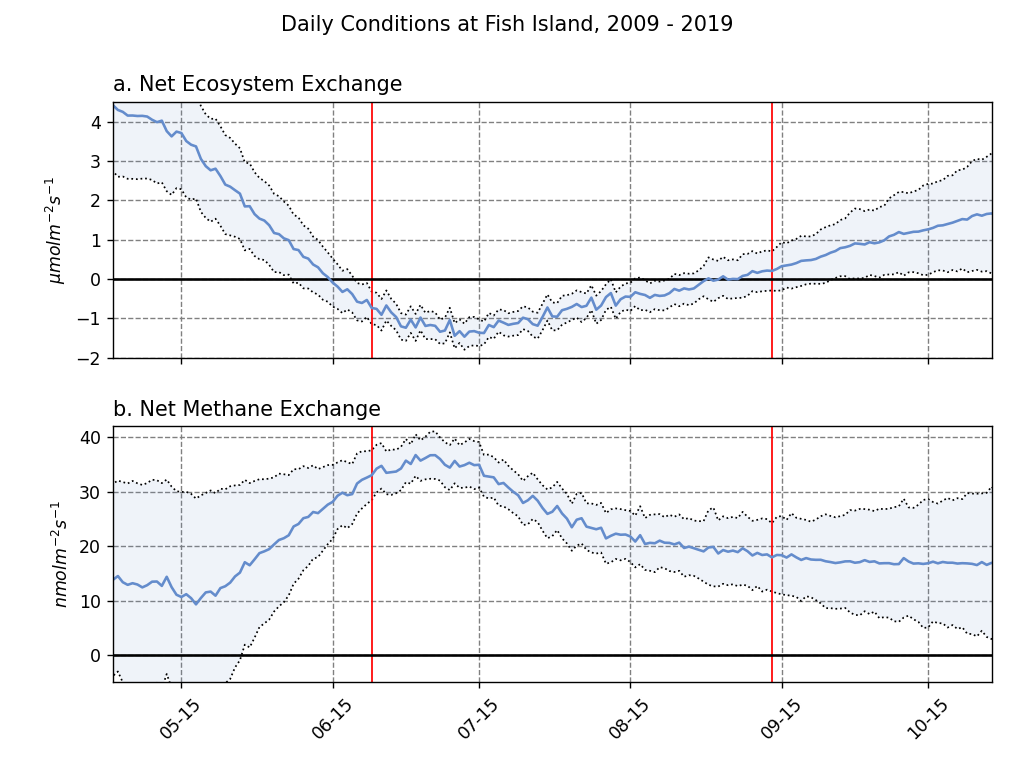

In [128]:
Data['MM-DD'] = Data.index.strftime('%m-%d')

DataT = Data.loc[((Data.index.month>=4)&(Data.index.month<=11))]

Data_d = DataT.groupby('MM-DD').mean()
Data_d['Rainfall'] = DataT.groupby('MM-DD').sum()['Rainfall']

fig,axes = plt.subplots(2,figsize=(6.5,5),sharex=True)#(18.2*cm_2_in, 13*cm_2_in),sharex=True)


ecolor='k'
ax = axes[0]
ax.plot(Data_d['NEE_est']*0,color='k')
ax.plot(Data_d['NEE_est'],color='#648ccc')
ax.fill_between(Data_d.index,Data_d['NEE_est']-Data_d['NEE_est_CI'],Data_d['NEE_est']+Data_d['NEE_est_CI'],
                facecolor='#648ccc1A',edgecolor=ecolor,linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('a. Net Ecosystem Exchange',loc='left')
ax.set_ylabel('$\mu mol m^{-2} s^{-1}$')
ax.set_ylim(-2,4.5)

ax = axes[1]
ax.plot(Data_d['NME_est']*0,color='k')
ax.plot(Data_d['NME_est'],color='#648ccc')
ax.fill_between(Data_d.index,Data_d['NME_est']-Data_d['NME_est_CI'],Data_d['NME_est']+Data_d['NME_est_CI'],
                facecolor='#648ccc1A',edgecolor=ecolor,linestyle=':')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title('b. Net Methane Exchange',loc='left')
ax.set_ylabel('$nmol m^{-2} s^{-1}$')
ax.set_ylim(-5,42)

for label in ax.get_xticklabels():
    label.set_ha("center")
    label.set_rotation(45)


D_d = DataT.resample('D').mean()
D_d['MM-DD'] = DataT.resample('D').first()['MM-DD']

for label in ax.get_xticklabels():
    label.set_ha("center")
    label.set_rotation(45)
    
    
for a in axes:
    a.axvspan('06-23','06-23',facecolor=[.97,.97,.97,.0],edgecolor='r')
    a.axvspan('09-13','09-13',facecolor=[.97,.97,.97,.0],edgecolor='r')

P = [0,14,30,44,61,75,92,105,123,136,153,167,183,197,210,228]
# P = [14,30,45,61,75,92,105,123,136,153,167,183,197,210]
# # # P = [0,14,31,45,61,75,92,106,123,137,153,167,183]
ax.set_xticks(P[1::2])
ax.set_xlim(30,210)

plt.suptitle('Daily Conditions at Fish Island, 2009 - 2019')

plt.tight_layout()

# plt.savefig('G:\\My Drive\\PhD_Thesis\\Chapter3_FiData/Drivers.jpg',dpi=600)
plt.savefig(G_Drive+'PhD_Thesis/Chapter3_Figs/'+'DailyFluxes.png')

In [ ]:
Data.loc[((Data.index.day == 31)&(Data.index.month==10)),'Season']=np.nan
Data['GS']=np.nan

Max_NDVI = (Data.resample('Y').max()[['NDVI_interp']])
for i,row in Max_NDVI.iterrows():
    MxD = Data.loc[((Data.index.year==i.year)&(Data.NDVI_interp==row['NDVI_interp']))].index.dayofyear[0]
    Max_NDVI.loc[Max_NDVI.index.year==i,'Max_Day']=MxD
    Data.loc[((Data.index.year==i.year)&(Data.index.dayofyear<=MxD)
             &(Data.NDVI_interp>=0.25)),'GS']=1
    Data.loc[((Data.index.year==i.year)&(Data.index.dayofyear>=MxD)
             &(Data.NDVI_interp/row['NDVI_interp']>=0.9)),'GS']=1
    Data.loc[((Data.index.year==i.year)&(Data.index.dayofyear>=MxD)
             &(Data.NDVI_interp/row['NDVI_interp']<=0.9)&(Data['Season']==1)),'GS']=0.5

Data['Season_Days'] = Data['Season']*Data.index.dayofyear
Data['GS_Days'] = Data['GS']*Data.index.dayofyear
Data['Season_Dates']=pd.to_datetime(Data.index.year * 1000 + Data['Season_Days'], format='%Y%j')
Data['GS_Dates']=pd.to_datetime(Data.index.year * 1000 + Data['GS_Days'], format='%Y%j')
    
print(Data.resample('Y').sum()[['Season','GS']]/24)
print(Data.resample('Y').min()[['Season_Dates','GS_Dates']])
print(Data.resample('Y').max()[['Season_Dates','GS_Dates']])   
    
Study_Year = Data.loc[Data.index.year == 2019]

plt.figure()
plt.plot(Study_Year[['Season']],color='k',linewidth=4)
# plt.plot(Study_Year[['GS']]+1)
x2 = plt.twinx()
# x2.plot(Study_Year['NDVI_interp']*100,color='orange')
x2.plot(Study_Year['NDSI_interp'],color='b')
x2.plot(Study_Year['snow_cover'],color='r')
print(Study_Year['ndvi_FI_LCP'].dropna())

<IPython.core.display.Javascript object>


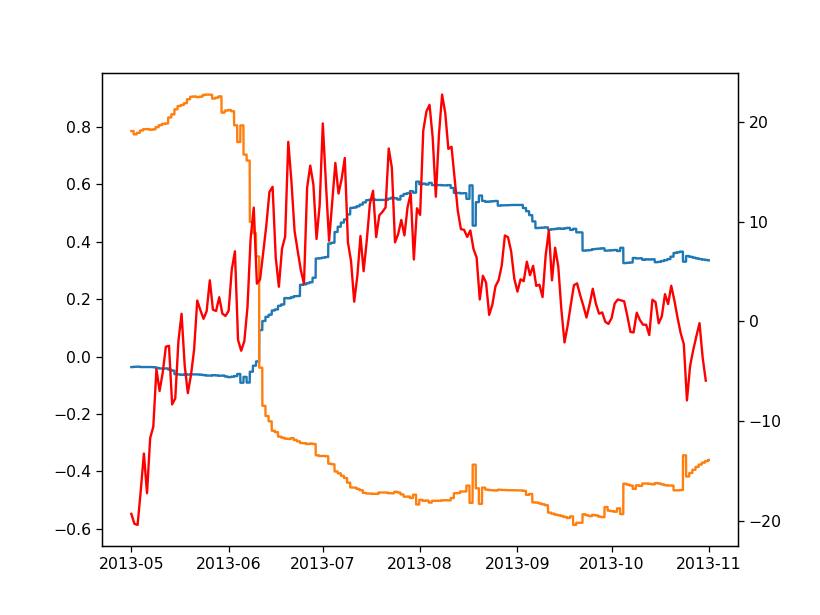

In [23]:
Study_Year = Data.loc[Data.index.year==2013]
# plt.figure()
# plt.scatter(Data['Full_Season'],Data['NDVI_FI_LCP'])
plt.plot(Study_Year['NDVI_FI_LCP'])
plt.plot(Study_Year['NDSI_FI_LCP'])
# # plt.plot(Study_Year['Snow'])
# # plt.plot(Study_Year['Season'])
ax2 = plt.twinx()
ax2.plot(Study_Year['Air_Temp'].resample('D').mean(),color='r')
# ax2.plot(Study_Year['snow_cover'],color='g')